<div align='center'><font size="5" color="#00000"><center><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"> Outlier Analysis </font></div> </h1></center>
<hr> 
> <center><img src="https://www.almostzara.com/wp-content/uploads/odd-one-out-group.jpg" width=800 ></center>
<hr> 
  
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>What is an Outlier? </strong> </font></div></h1>
<div align='left'><font size="3" color="#000000"> Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.let’s take an example to check what happens to a data set with and data set without outliers.
</font></div>

|| | Data without outlier |  | Data with outlier | 
|--||--||--|
|**Data**| |1,2,3,3,4,5,4 |  |1,2,3,3,4,5,**400** | 
|**Mean**| |3.142 | |**59.714** |  
|**Median**| |3|  |3|
|**Standard Deviation**| |1.345185| |**150.057**|

<div align='left'><font size="3" color="#000000"> As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 3.14. But with the outlier, average soars to 59.71. This would change the estimate completely.
</font></div>

> <center><img src="https://pbs.twimg.com/media/EDANCjJXkAAOSjO.jpg" width="600px"></center>
> <center>The above meme makes you better understanding of outlier. 

<div align='left'><font size="3" color="#000000"> Lets take a real world example. In a company of 50 employees, 45 people having monthly salary of Rs.6,000, 5 senior employees having monthly salary of Rs.100000 each. If you calculate the average monthly salary of employees in the company is Rs.14,500, which will give you the wrong conclusion (majority of employees have lesser than 14.5k salary). But if you take median salary, it is Rs.6000 which is more sense than the average.For this reason median is appropriate measure than mean. Here you can see the effect of outlier.
</font></div>    
<hr>   
<div class="alert alert-info" ><font size="3"><strong> Outlier </strong> is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.</div>
<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Cause for outliers</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000"> * Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. </font></div> 
<div align='left'><font size="3" color="#000000"> * Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. </font></div> 
<div align='left'><font size="3" color="#000000"> * Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. </font></div> 
<div align='left'><font size="3" color="#000000"> * Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.</font></div> 
<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Outlier Detection</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000"> Outlier can be of two types: Univariate and Multivariate. Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. </font></div> 
<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Different outlier detection technique.</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000"> 1. Hypothesis Testing </font></div> 
<div align='left'><font size="3" color="#000000"> 2. Z-score method </font></div> 
<div align='left'><font size="3" color="#000000"> 3. Robust Z-score</font></div> 
<div align='left'><font size="3" color="#000000"> 4. I.Q.R method </font></div> 
<div align='left'><font size="3" color="#000000"> 5. Winsorization method(Percentile Capping) </font></div> 
<div align='left'><font size="3" color="#000000"> 6. DBSCAN Clustering</font></div> 
<div align='left'><font size="3" color="#000000"> 7. Isolation Forest </font></div> 
<div align='left'><font size="3" color="#000000"> 8. Visualizing the data</font></div> 
<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>1. Hypothesis Testing(grubbs test)</strong> </font></div>
<hr>
$$
\begin{array}{l}{\text { Grubbs' test is defined for the hypothesis: }} \\ {\begin{array}{ll}{\text { Ho: }}  {\text { There are no outliers in the data set }} \\ {\mathrm{H}_{\mathrm{1}} :}  {\text { There is exactly one outlier in the data set }}\end{array}}\end{array}
$$
$$
\begin{array}{l}{\text {The Grubbs' test statistic is defined as: }} \\ {\qquad G_{calculated}=\frac{\max \left|X_{i}-\overline{X}\right|}{SD}} \\ {\text { with } \overline{X} \text { and } SD \text { denoting the sample mean and standard deviation, respectively. }} \end{array}
$$
$$
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
$$

\begin{array}{l}{\text { If the calculated value is greater than critical, you can reject the null hypothesis and conclude that one of the values is an outlier }}\end{array}

In [1]:
import numpy as np
import scipy.stats as stats
x = np.array([12,13,14,19,21,23])
y = np.array([12,13,14,19,21,23,45])
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
grubbs_test(x)
grubbs_test(y)

Grubbs Calculated Value: 1.4274928542926593
Grubbs Critical Value: 1.887145117792422
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers

Grubbs Calculated Value: 2.2765147221587774
Grubbs Critical Value: 2.019968507680656
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>2. Z-score method</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000"> Using Z score method,we can find out how many standard deviations value away from the mean. </font></div> 
<img style="float: center;"  src="https://i.pinimg.com/originals/cd/14/73/cd1473c4c82980c6596ea9f535a7f41c.jpg" width="350px">
<hr>
<div align='left'><font size="3" color="#000000">  Figure in the left shows area under normal curve and how much area that standard deviation covers. </font></div> 
<div align='left'><font size="3" color="#000000"> * 68% of the data points lie between + or - 1 standard deviation.</font></div>
<div align='left'><font size="3" color="#000000"> * 95% of the data points lie between + or - 2 standard deviation</font></div>
<div align='left'><font size="3" color="#000000"> * 99.7% of the data points lie between + or - 3 standard deviation</font></div>
<hr>
<div align='left'><font size="3" color="#000000"> Z-score formula</font></div>

\begin{array}{l} {Z score=\frac{ X - Mean}{Standard Deviation}}  \end{array}
<hr>
<div align='left'><font size="3" color="#000000"> If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.</font></div>


In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(train['LotArea'])

Outliers: [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>3. Robust Z-score</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000"> It is also called as Median absolute deviation method. It is similar to Z-score method with some changes in parameters. Since mean and standard deviations are heavily influenced by outliers, alter to this parameters we use median and absolute deviation from median. </font></div> 
<hr>
<div align='left'><font size="3" color="#000000"> Robust Z-score formula </font></div> 
<div align='left'><font size="3" color="#000000"> \begin{array}{l} {R.Z.score=\frac{0.6745*( X_{i} - Median)}{MAD}}  \end{array} </font></div> 
<div align='center'><font size="2.5" color="#000000"> Where MAD = median(|X-median|)</font></div> 
<hr>
<div align='left'><font size="3" color="#000000"> Suppose x follows a standard normal distribution. The MAD will converge to the median of the half normal distribution, which is the 75% percentile of a normal distribution, and  N(0.75)≃0.6745.</font></div> 



In [3]:
import pandas as pd
import numpy as np
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
ZRscore_outlier(train['LotArea'])

Outliers: [50271, 31770, 22950, 25419, 159000, 39104, 215245, 164660, 53107, 34650, 70761, 53227, 40094, 32668, 25095, 46589, 26178, 115149, 53504, 28698, 45600, 25286, 27650, 24090, 25000, 29959, 23257, 35760, 35133, 32463, 24682, 23595, 36500, 63887, 25339, 57200, 26142]


<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>4. IQR method</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers </font></div> 
<hr>
<img style="float: center;"  src=" https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width="400px">
<hr> 
<div align='left'><font size="3" color="#000000">* Q1 represents the 1st quartile/25th percentile of the data.</font></div> 
<div align='left'><font size="3" color="#000000">* Q2 represents the 2nd quartile/median/50th percentile of the data.</font></div>
<div align='left'><font size="3" color="#000000">* Q3 represents the 3rd quartile/75th percentile of the data. </font></div>
<div align='left'><font size="3" color="#000000">* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR)
    represnt the largest value in the data set.</font></div>



In [4]:
import pandas as pd
import numpy as np
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(train['LotArea'])

Outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>5. Winsorization Method(Percentile Capping)</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.</font></div> 
<hr>

In [5]:
import pandas as pd
import numpy as np
train = pd.read_csv('../input/titanic/train.csv')
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(train['Fare'])

Outliers: [263.0, 263.0, 512.3292, 262.375, 263.0, 263.0, 512.3292, 512.3292, 262.375]


<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>6. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">DBSCAN is a density based clustering algorithm that divides a dataset into subgroups of high density regions and identifies high density regions cluster as outliers. Here cluster -1 indicates that the cluster contains outlier and rest of clusters have no outliers. This approch is similar to the K-mean clustering. There are two parameters required for DBSCAN. DBSCAN give best result for multivariate outlier detection.</font></div> 
<hr>
<div align='left'><font size="3" color="#000000">1. epsilon:  a distance parameter that defines the radius to search for nearby neighbors.</font></div> 
<div align='left'><font size="3" color="#000000">2. minimum amount of points required to form a cluster.</font></div> 
<img style="float: center;"  src="https://qphs.fs.quoracdn.net/main-qimg-384458d7ab61f88e443b5e99bcd06622" width="350px">
<hr> 
<div align='left'><font size="3" color="#000000">Using epsilon and minPts, we can classify each data point as:</font></div> 
 <hr>    
<div align='left'><font size="3" color="#000000">Core point –> a point that has at least a minimum number of other points (minPts) within its radius.
</font></div> 
<div align='left'><font size="3" color="#000000">Border point –> a point is within the  radius of a core point but has less than the minimum number of other points (minPts) within its own radius.</font></div>
<div align='left'><font size="3" color="#000000">Noise point –> a point that is neither a core point or a border point </font></div>


In [6]:
import pandas as pd
from sklearn.cluster import DBSCAN
train = pd.read_csv('../input/titanic/train.csv')
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))
DB_outliers(train['Fare']) 

 0     705
 2      50
 4      36
-1      32
 6      15
 1      12
 7       8
 5       7
 8       7
 9       7
 3       6
 10      6
Name: cluster, dtype: int64


<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>7. Isolation Forest</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">It is an clustering algorithm that belongs to the ensemble decision trees family and is similar in principle to Random Forest. </font></div> 
<hr>
<img style="float: center;"  src="https://miro.medium.com/max/875/0*0GuMixLdSZo3V3Nh." width="450px">
<hr>       
<div align='left'><font size="3" color="#000000">1. It classify the data point to outlier and not outliers and works great with very high dimensional data.</font></div>  <hr>     
<div align='left'><font size="3" color="#000000">2. It works based on decision tree and it isolate the outliers.</font></div>  <hr>     
<div align='left'><font size="3" color="#000000">3. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier. </font></div> 


In [7]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
train = pd.read_csv('../input/titanic/train.csv')
train['Fare'].fillna(train[train.Pclass==3]['Fare'].median(),inplace=True)
def Iso_outliers(df):
    iso = IsolationForest( behaviour = 'new', random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))
Iso_outliers(train['Fare']) 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


 1    706
-1    185
Name: cluster, dtype: int64


<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>8. Visualizing the data</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">Data visualization is useful for data cleaning, exploring data, detecting outliers and unusual groups, identifying trends and clusters etc. Here the list of data visualization plots to spot the outliers. </font></div> 
<hr>      
<div align='left'><font size="3" color="#000000">1. Box and whisker plot (box plot).</font></div>     
<div align='left'><font size="3" color="#000000">2. Scatter plot.</font></div>     
<div align='left'><font size="3" color="#000000">3. Histogram. </font></div> 
<div align='left'><font size="3" color="#000000">4. Distribution Plot.</font></div>     
<div align='left'><font size="3" color="#000000">5. QQ plot. </font></div> 


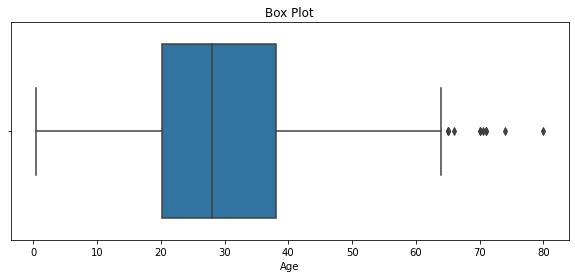

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


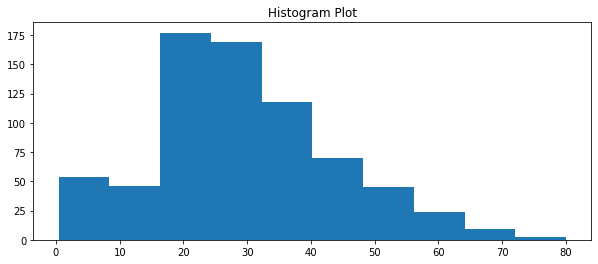

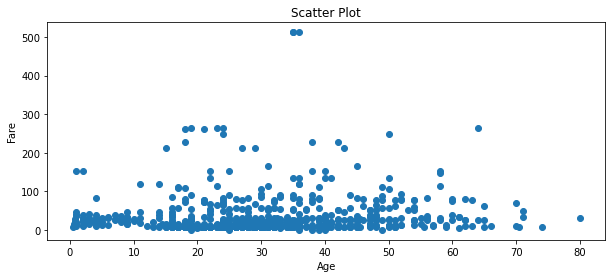

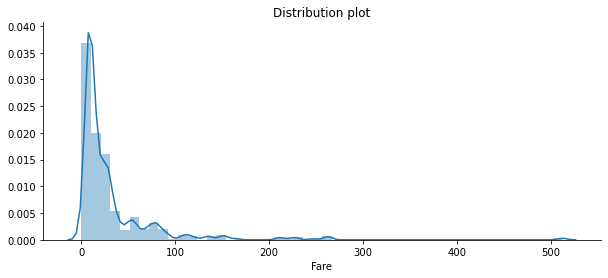

<Figure size 720x288 with 0 Axes>

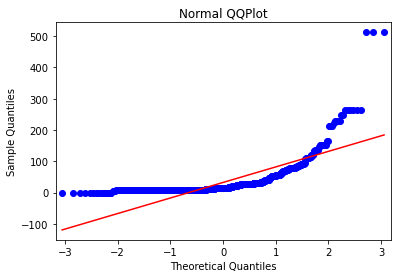

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
train = pd.read_csv('../input/titanic/train.csv')
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(train['Age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(train['Age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(train['Age'],train['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(train['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(train['Fare'])



<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>What Next??</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">After detecting the outlier we should remove\treat the outlier because <strong>it is a silent killer!!</strong> yes. </font></div> 
<hr>      
<div align='left'><font size="3" color="#000000">* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.</font></div>     
<div align='left'><font size="3" color="#000000">* It increases the error variance and reduces the power of statistical tests.</font></div>     
<div align='left'><font size="3" color="#000000">* If the outliers are non-randomly distributed, they can decrease normality.</font></div> 
<div align='left'><font size="3" color="#000000">* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.</font></div>     
<div align='left'><font size="3" color="#000000">* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.</font></div> 
<hr>  
<div align='left'><font size="3" color="#000000">With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. There are some techniques used to deal with outliers.</font></div> 
<hr>  
<div align='left'><font size="3" color="#000000">1. Deleting observations.</font></div>     
<div align='left'><font size="3" color="#000000">2. Transforming values.</font></div> 
<div align='left'><font size="3" color="#000000">3. Imputation.</font></div>  
<div align='left'><font size="3" color="#000000">4. Separately treating</font></div> 
<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Deleting observations:</strong> </font></div> 
<div align='left'><font size="3" color="#000000">We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset.</font></div> 

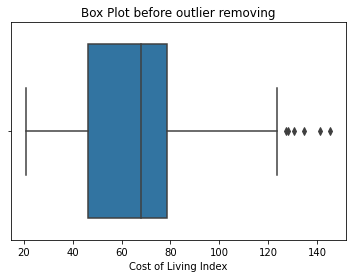

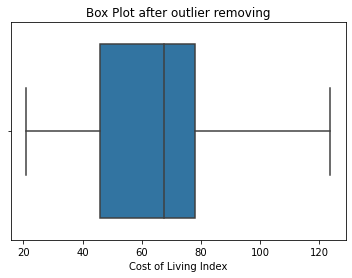

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('../input/cost-of-living/cost-of-living-2018.csv')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(train, 'Cost of Living Index')
sns.boxplot(train['Cost of Living Index'])
plt.title("Box Plot after outlier removing")
plt.show()

<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Transforming values:</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">Transforming variables can also eliminate outliers. These transformed values reduces the variation caused by extreme values.</font></div> 
<hr>   
 
<div align='left'><font size="3" color="#000000">1. Scalling</font></div>     
<div align='left'><font size="3" color="#000000">2. Log transformation</font></div> 
<div align='left'><font size="3" color="#000000">3. Cube Root Normalization</font></div>  
<div align='left'><font size="3" color="#000000">4. Box-Cox transformation</font></div> 
<hr>
    
<div align='left'><font size="3" color="#000000">* These techniques convert values in the dataset to smaller values.</font></div>     
<div align='left'><font size="3" color="#000000">* If the data has to many extreme values or skewed, this method helps to make your data normal.</font></div>     
<div align='left'><font size="3" color="#000000">* But These technique not always give you the best results. </font></div> 
<div align='left'><font size="3" color="#000000">* There is no lose of data from these methods.</font></div>     
<div align='left'><font size="3" color="#000000">* In all these method boxcox transformation gives the best result.</font></div> 
<hr>  

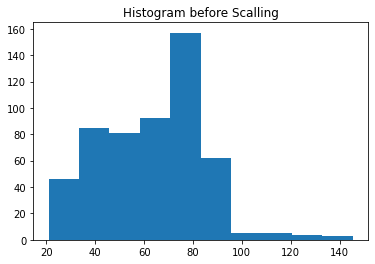

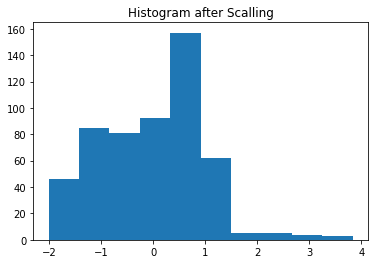

In [10]:
#Scalling
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
train = pd.read_csv('../input/cost-of-living/cost-of-living-2018.csv')
plt.hist(train['Cost of Living Index'])
plt.title("Histogram before Scalling")
plt.show()
scaler = preprocessing.StandardScaler()
train['Cost of Living Index'] = scaler.fit_transform(train['Cost of Living Index'].values.reshape(-1,1))
plt.hist(train['Cost of Living Index'])
plt.title("Histogram after Scalling")
plt.show()

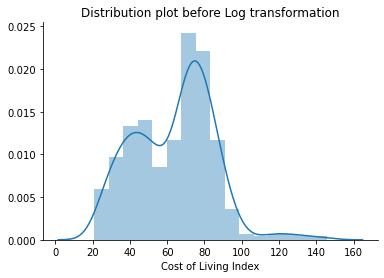

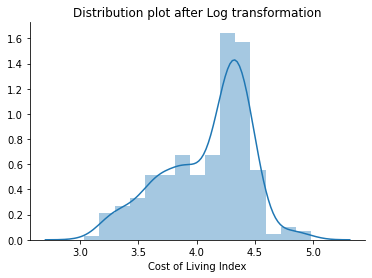

In [11]:
#Log Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('../input/cost-of-living/cost-of-living-2018.csv')
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
train['Cost of Living Index'] = np.log(train['Cost of Living Index'])
sns.distplot(train['Cost of Living Index'])
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


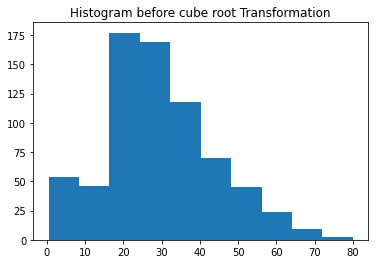

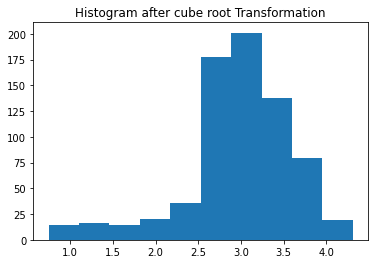

In [12]:
#cube root Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
train = pd.read_csv('../input/titanic/train.csv')
plt.hist(train['Age'])
plt.title("Histogram before cube root Transformation")
plt.show()
train['Age'] = (train['Age']**(1/3))
plt.hist(train['Age'])
plt.title("Histogram after cube root Transformation")
plt.show()

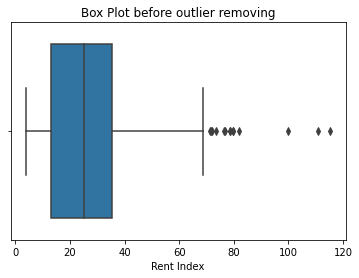

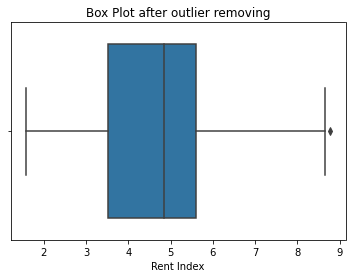

In [13]:
#Box-transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
train = pd.read_csv('../input/cost-of-living/cost-of-living-2018.csv')
sns.boxplot(train['Rent Index'])
plt.title("Box Plot before outlier removing")
plt.show()
train['Rent Index'],fitted_lambda= scipy.stats.boxcox(train['Rent Index'] ,lmbda=None)
sns.boxplot(train['Rent Index'])
plt.title("Box Plot after outlier removing")
plt.show()

<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Imputation</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.</font></div> 
    

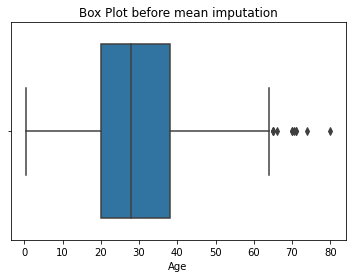

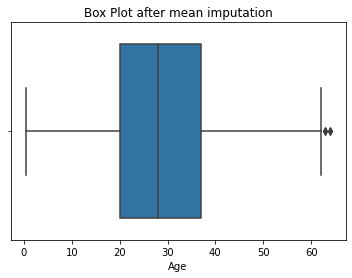

In [14]:
#mean imputation
import pandas as pd
import numpy as np
train = pd.read_csv('../input/titanic/train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, m)
sns.boxplot(train['Age'])
plt.title("Box Plot after mean imputation")
plt.show()   

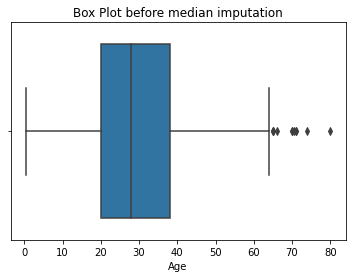

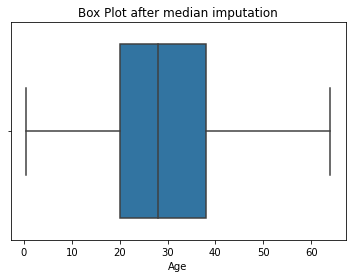

In [15]:
#median imputation
import pandas as pd
import numpy as np
train = pd.read_csv('../input/titanic/train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(train['Age'])
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, med)
sns.boxplot(train['Age'])
plt.title("Box Plot after median imputation")
plt.show()            


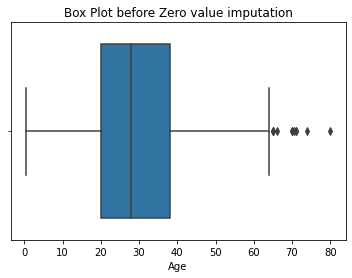

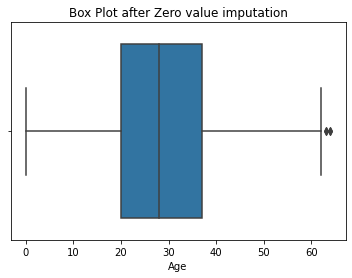

In [16]:
#Zero value imputation
import pandas as pd
import numpy as np
train = pd.read_csv('../input/titanic/train.csv')
sns.boxplot(train['Age'])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in train['Age']:
    if i > Upper_tail or i < Lower_tail:
            train['Age'] = train['Age'].replace(i, 0)
sns.boxplot(train['Age'])
plt.title("Box Plot after Zero value imputation")
plt.show()            


<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Separately treating</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">If there are significant number of outliers and dataset is small , we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output. But this technique is tedious when the dataset is large.</font></div> 
<hr>
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>Conclusion</strong> </font></div>
<hr>
<div align='left'><font size="3" color="#000000">1. Median is best measure of central tendency when the data has outlier or skewed.</font></div> 
<div align='left'><font size="3" color="#000000">2. Winsorization Method or Percentile Capping is the better outlier detection technique the others.</font></div> 
<div align='left'><font size="3" color="#000000">3. Median imputation completely remove outlier.</font></div> 
<hr>
<div align='left'><font size="3" color="#000000">Outlier is one of the major problem in machine learning. If you neglect the outlier result with bad performance of the model. In this kernel I'm try to cover almost all the topics related to outliers, outlier detection, outlier treatment techniques. </font></div> 

<hr>   
<div class="alert alert-warning" ><font size="3"><strong>Please note that some of the techniques mentioned in this kernel may not gave the best result all the time. So be careful when you try to detect/impute outliers.</strong> </div><hr>  
<div align='left'><font size="4" color="#000000"><h1 style="text-transform: uppercase"><strong>References</strong> </font></div>
<hr>
<div align='left'><font size="3"><a href="https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32" target="_blank">1. Finding outliers in dataset using python</a></div>
<div align='left'><font size="3"><a href="http://www.askanalytics.in/p/outlier-treatment.html" target="_blank">2. Outlier Detection - Basics</a></div>
<div align='left'><font size="3"><a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba" target="_blank">3. Ways to Detect and Remove the Outliers</a></div>
<div align='left'><font size="3"><a href="https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html" target="_blank">4. Four Techniques for Outlier Detection - KDnuggets</a></div>
<hr>   
<div class="alert alert-success" ><font size="4"><strong>Feel free to ask any question related to this topic. I'm happy to answer. If you like my work don't hesitate to upvote. HAPPY LEARNING :) </strong> </div>

<img style="float: center;"  src="https://img.pngio.com/thumbs-up-emoticon-thumb-up-and-down-emoji-png-image-thumbs-up-emoji-transparent-background-820_516.png" width="450px">

    
